In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

### Récupérer les données dans train et test

Chaque ligne contient les séries pour les 3 capteurs puis la classe:

    longueur | 512 mesures pour capteur 1 | 512 mesures pour capteur 2 | 512 mesures pour capteur 3 | 512 mesures pour capteur 4 | Chiffre vu |

In [2]:
from tools.data import get_datasets

train, test = get_datasets()
print train.shape
print test.shape

Reading data file
(30000, 2050)
(10983, 2050)


## Afficher les 300 premières courbes

/home/python/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


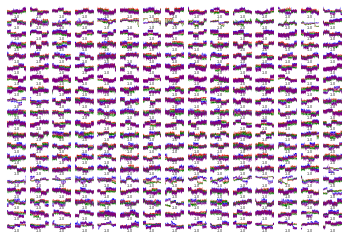

In [7]:
rows = 20
cols = 15

for i in range(rows * cols):
    
    code = test[i,-1]
    
    axe = plt.subplot(rows, cols, i)
    plt.setp(axe, 'frame_on', False)
    axe.set_xticks([])
    axe.set_yticks([])
    axe.xaxis.set_label_coords(0.5, 0.2)
    axe.set_xlabel(str(code), size=3)
    axe.plot(train[i,1:1+train[i,0]], linewidth=0.1, c='b')
    axe.plot(train[i,1+512*1:1+512*1+train[i,0]], linewidth=0.1, c='r')
    axe.plot(train[i,1+512*2:1+512*2+train[i,0]], linewidth=0.1, c='g')
    axe.plot(train[i,1+512*3:1+512*3+train[i,0]], linewidth=0.1, c='purple')
    # axe.set_title(str(code))

plt.savefig('test.pdf', format='pdf')

plt.show()

    

## Afficher uniquement les -1

/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


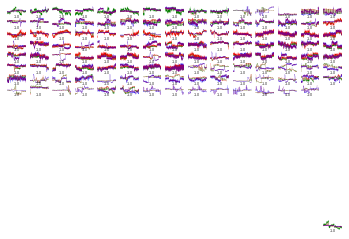

In [18]:
rows = 20
cols = 15

display_only = -1
selected = np.compress(train[:,-1] == display_only, train, axis=0)

for i in range(min(rows * cols, selected.shape[0])):
    
    code = selected[i,-1]
    
    axe = plt.subplot(rows, cols, i)
    plt.setp(axe, 'frame_on', False)
    axe.set_xticks([])
    axe.set_yticks([])
    axe.xaxis.set_label_coords(0.5, 0.2)
    axe.set_xlabel(str(code), size=3)
    axe.plot(selected[i,1:1+selected[i,0]], linewidth=0.1, c='b')
    axe.plot(selected[i,1+512*1:1+512*1+selected[i,0]], linewidth=0.1, c='r')
    axe.plot(selected[i,1+512*2:1+512*2+selected[i,0]], linewidth=0.1, c='g')
    axe.plot(selected[i,1+512*3:1+512*3+selected[i,0]], linewidth=0.1, c='purple')
    # axe.set_title(str(code))

plt.savefig('test-%d.pdf' % display_only, format='pdf')

plt.show()

## Afficher un histogramme des longueurs des séries

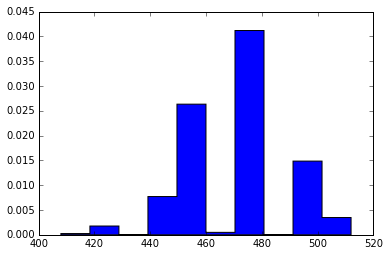

In [5]:
n, bins, patches = plt.hist(train[:,0], 10, normed=1, histtype='stepfilled')
plt.show()


## Afficher la répartition des classes
On regarde si la répartition entre les différents classes (et -1) est équivalente (graphiquement)

[ 0.27243333  0.0729      0.07056667  0.07313333  0.07296667  0.06993333
  0.07283333  0.0757      0.07343333  0.07443333  0.07166667]


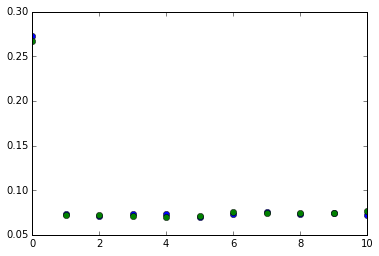

In [6]:
train_rep = np.zeros(11)
test_rep = np.zeros(11)

for i in range(11):
    train_rep[i] = float((train[:,-1] == i - 1).sum()) / train.shape[0]
    test_rep[i] = float((test[:,-1] == i - 1).sum()) / test.shape[0]
    
plt.plot(train_rep, 'o')
plt.plot(test_rep, 'o')

print train_rep

## Découper la série en séries plus courtes

Sur la totalité du signal, peut être qu'une toute petite partie nous intéresse et que le reste est du bruit pour le problème qui nous intéresse. Ici on montre une fonction qui permet de découper les séquences en n sous-séquences de longueur donnée. En sortie on a toujours les 4 capteurs, donc au final on aura un vecteur avec 4 * length composantes + 1 pour le chiffre vu.

In [5]:
from tools.data import split_into_subsequences

"""
split_into_subsequences(data, n, length)

data: le dataset en entrée (ex train/test fournis par get_datasets)
n : le nombre de séries en sortie
length : la longueur de chaque série en sortie
"""
o = split_into_subsequences(train, 2, 256)

print o.shape

(60000, 1025)


In [46]:
import random

random.seed(111)
l = range(10)
random.shuffle(l)
print l

[9, 5, 4, 0, 6, 2, 3, 7, 1, 8]
